In [16]:
import pandas as pd

# Load the dataset
file_path = '/Users/chetan/Leetcode_DataExtraction/github_users_combined.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

# Get the column names
column_names = data.columns.tolist()

# Get the number of rows and columns
num_rows, num_columns = data.shape

# Print the results
print("Column Names:", column_names)
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Column Names: ['username', 'name', 'bio', 'profile_links', 'public_repos', 'total_stars', 'total_forks', 'most_used_language', 'followers', 'following', 'contributions_last_year', 'account_created', 'location', 'company', 'email', 'blog', 'scraped_at', 'language_stats', 'language_1', 'language_1_pct', 'language_2', 'language_2_pct', 'language_3', 'language_3_pct', 'language_4', 'language_4_pct', 'language_5', 'language_5_pct', 'language_6', 'language_6_pct', 'language_7', 'language_7_pct', 'language_8', 'language_8_pct', 'language_9', 'language_9_pct', 'language_10', 'language_10_pct']
Number of Rows: 4334
Number of Columns: 38


In [18]:
import pandas as pd

# Load the new dataset
file_path = '/Users/chetan/Leetcode_DataExtraction/github_users_combined.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

# 1. Define the Columns to Keep
required_columns = [
    'username', 'bio', 'profile_links', 'public_repos', 'total_stars', 'total_forks', 
    'most_used_language', 'followers', 'following', 'contributions_last_year', 
    'account_created', 'location', 'company', 'email', 'blog', 'language_stats'
]

# 2. Filter the Dataset to Keep Only the Required Columns
filtered_data = data[required_columns]

# 3. Save the Cleaned Dataset
output_file_path = 'cleaned_dataset.csv'  # Replace with your desired output file path
filtered_data.to_csv(output_file_path, index=False)

print("Cleaned dataset saved to:", output_file_path)
print("Columns in the cleaned dataset:", filtered_data.columns.tolist())
print("Number of rows in the cleaned dataset:", len(filtered_data))

Cleaned dataset saved to: cleaned_dataset.csv
Columns in the cleaned dataset: ['username', 'bio', 'profile_links', 'public_repos', 'total_stars', 'total_forks', 'most_used_language', 'followers', 'following', 'contributions_last_year', 'account_created', 'location', 'company', 'email', 'blog', 'language_stats']
Number of rows in the cleaned dataset: 4334


In [1]:
import pandas as pd
from rake_nltk import Rake
from datetime import datetime

# Load the cleaned dataset
file_path = 'cleaned_dataset.csv'  # Replace with the actual path to your cleaned dataset
data = pd.read_csv(file_path)

# 1. Calculate Experience Level
def calculate_experience(account_created):
    if pd.isna(account_created):
        return 0
    created_date = datetime.strptime(account_created, '%Y-%m-%d')
    today = datetime.today()
    return (today - created_date).days // 365

data['experience_years'] = data['account_created'].apply(calculate_experience)

# 2. Extract Skill Keywords from Bio
def extract_skills(bio):
    if pd.isna(bio):
        return []
    rake = Rake()
    rake.extract_keywords_from_text(bio)
    return rake.get_ranked_phrases()

data['skills'] = data['bio'].apply(extract_skills)

# 3. Create a Popularity Score
data['popularity_score'] = data['total_stars'] + data['total_forks']

# 4. Parse Language Stats (if needed)
# Assuming language_stats is a JSON string or dictionary
import ast
def parse_language_stats(language_stats):
    if pd.isna(language_stats):
        return {}
    return ast.literal_eval(language_stats)

data['language_stats_parsed'] = data['language_stats'].apply(parse_language_stats)

# Save the dataset with extracted features
output_file_path = 'dataset_with_extracted_features.csv'  # Replace with your desired output file path
data.to_csv(output_file_path, index=False)

print("Dataset with extracted features saved to:", output_file_path)

Dataset with extracted features saved to: dataset_with_extracted_features.csv


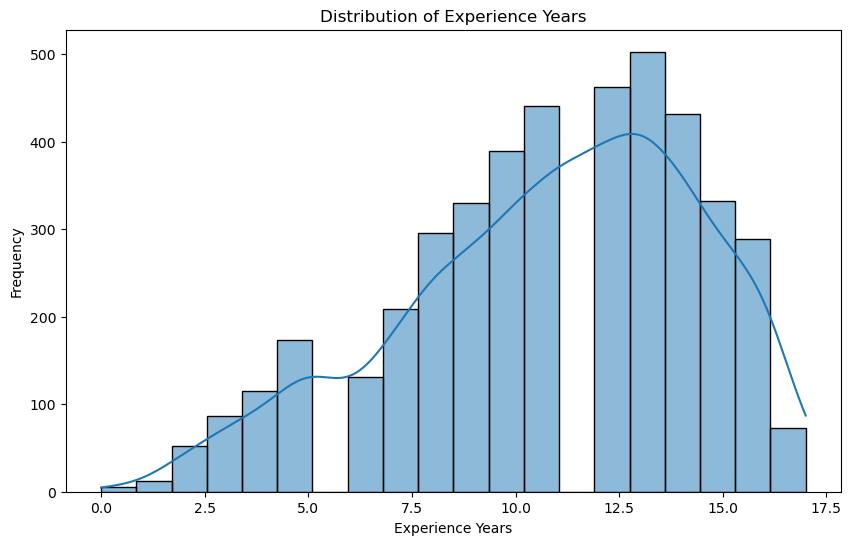

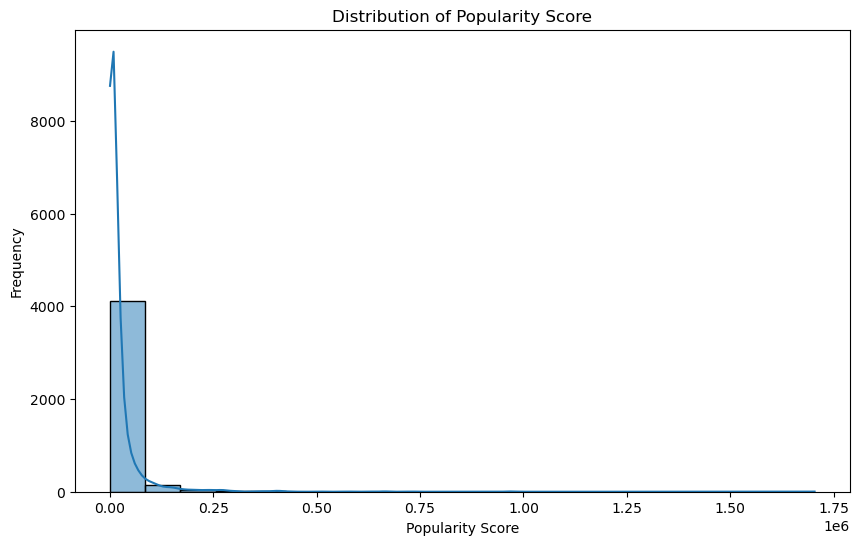

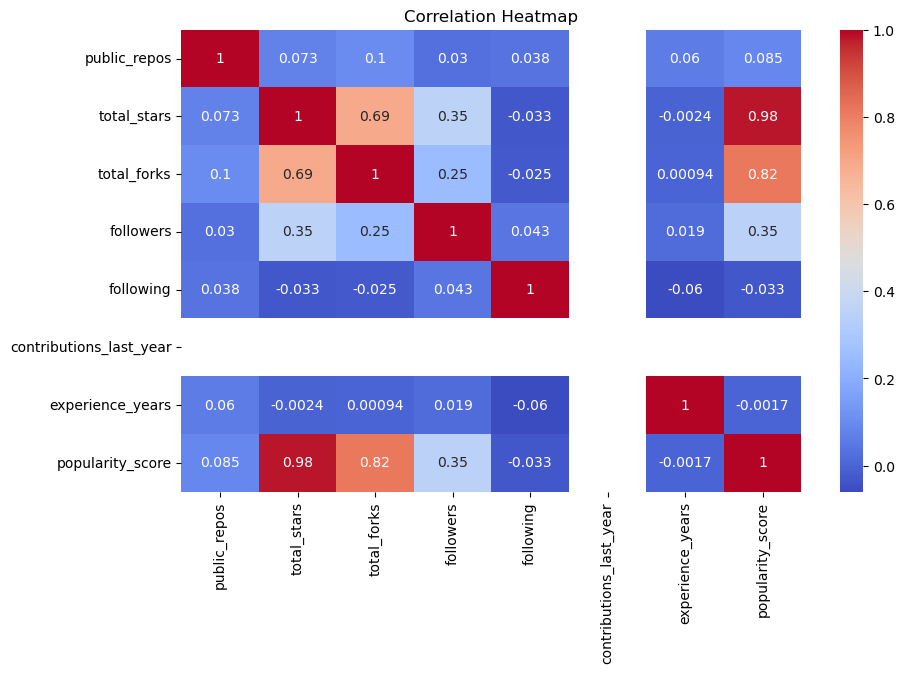

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with extracted features
file_path = 'dataset_with_extracted_features.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

# 1. Distribution of Experience Years
plt.figure(figsize=(10, 6))
sns.histplot(data['experience_years'], bins=20, kde=True)
plt.title('Distribution of Experience Years')
plt.xlabel('Experience Years')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Popularity Score
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity_score'], bins=20, kde=True)
plt.title('Distribution of Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = data[['public_repos', 'total_stars', 'total_forks', 'followers', 'following', 'contributions_last_year', 'experience_years', 'popularity_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/Users/chetan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


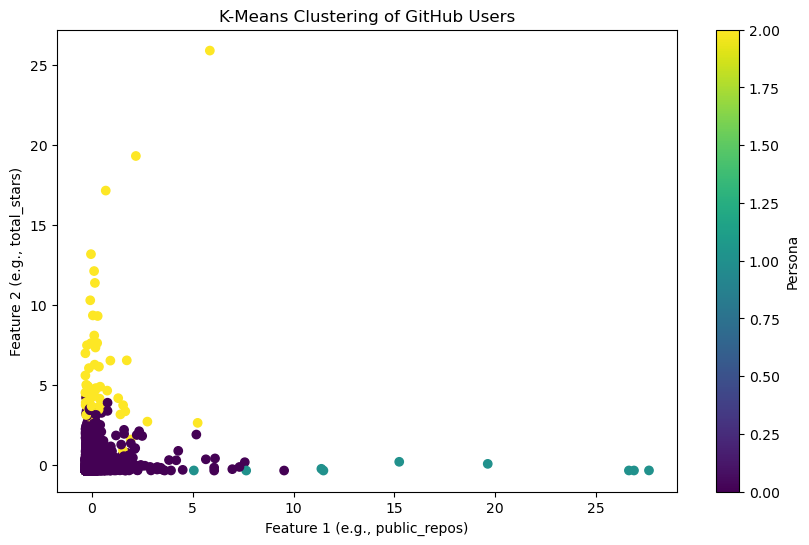

Dataset with personas saved to: dataset_with_personas.csv


In [3]:
# #Feature Fusion:
# Combine the extracted features into a single feature set for each user. For example:

# Numerical Features:

# public_repos

# total_stars

# total_forks

# followers

# following

# contributions_last_year

# experience_years

# popularity_score

# Categorical Features:

# most_used_language

# primary_language (from language_stats_parsed)

# Textual Features:

# skills (extracted from bio)

# bio (raw text for embedding)

# Step 2: Persona Modeling:
# Use clustering or classification algorithms to group users into personas. Here’s how:

# Option 1: Clustering (Unsupervised Learning):
# Use algorithms like K-Means or DBSCAN to group users based on their features.

# Example personas:

# Open-Source Contributor: High public_repos, total_stars, total_forks.

# Competitive Programmer: High activity on LeetCode (if integrated later).

# Researcher: Strong presence on ResearchGate (if integrated later).


import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset with extracted features
file_path = 'dataset_with_extracted_features.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['public_repos', 'total_stars', 'total_forks', 'followers', 'following', 'contributions_last_year', 'experience_years', 'popularity_score']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters based on your needs
data['persona'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['persona'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of GitHub Users')
plt.xlabel('Feature 1 (e.g., public_repos)')
plt.ylabel('Feature 2 (e.g., total_stars)')
plt.colorbar(label='Persona')
plt.show()

# Save the dataset with personas
output_file_path = 'dataset_with_personas.csv'  # Replace with your desired output file path
data.to_csv(output_file_path, index=False)

print("Dataset with personas saved to:", output_file_path)

In [6]:
import pandas as pd

# Load the dataset with extracted features
file_path = '/Users/chetan/Leetcode_DataExtraction/dataset_with_personas.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

# 1. Filter numeric columns for aggregation
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns.tolist())

# 2. Compute mean values of numeric features for each cluster
cluster_summary = data.groupby('persona')[numeric_columns].mean()
print("Cluster Summary (Numeric Features):")
print(cluster_summary)

# 3. Analyze non-numeric columns separately
# Example: Count unique skills in each cluster
if 'skills' in data.columns:
    data['skills_count'] = data['skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    skills_summary = data.groupby('persona')['skills_count'].mean()
    print("Average Number of Skills per Cluster:")
    print(skills_summary)

# Example: Extract most common primary language in each cluster
if 'most_used_language' in data.columns:
    language_summary = data.groupby('persona')['most_used_language'].agg(lambda x: x.mode()[0])
    print("Most Common Primary Language per Cluster:")
    print(language_summary)

Numeric Columns: ['public_repos', 'total_stars', 'total_forks', 'followers', 'following', 'contributions_last_year', 'experience_years', 'popularity_score', 'persona']
Cluster Summary (Numeric Features):
         public_repos  total_stars   total_forks     followers     following  \
persona                                                                        
0          127.905031   13239.2433   2960.413023   3309.072167    515.068876   
1         4318.812500    3574.1250   1775.750000   7530.187500  88963.187500   
2          337.343750  270832.1250  82970.515625  22097.671875      5.218750   

         contributions_last_year  experience_years  popularity_score  persona  
persona                                                                        
0                            0.0         10.859426      16199.656323      0.0  
1                            0.0          9.250000       5349.875000      1.0  
2                            0.0         10.765625     353802.640625      2

In [7]:
# Assign persona labels based on cluster numbers
persona_labels = {
    0: 'JavaScript Developers',
    1: 'C++ Enthusiasts',
    2: 'Python Superstars'
}

data['persona_label'] = data['persona'].map(persona_labels)

# Save the dataset with persona labels
output_file_path = 'dataset_with_persona_labels.csv'  # Replace with your desired output file path
data.to_csv(output_file_path, index=False)

print("Dataset with persona labels saved to:", output_file_path)

Dataset with persona labels saved to: dataset_with_persona_labels.csv


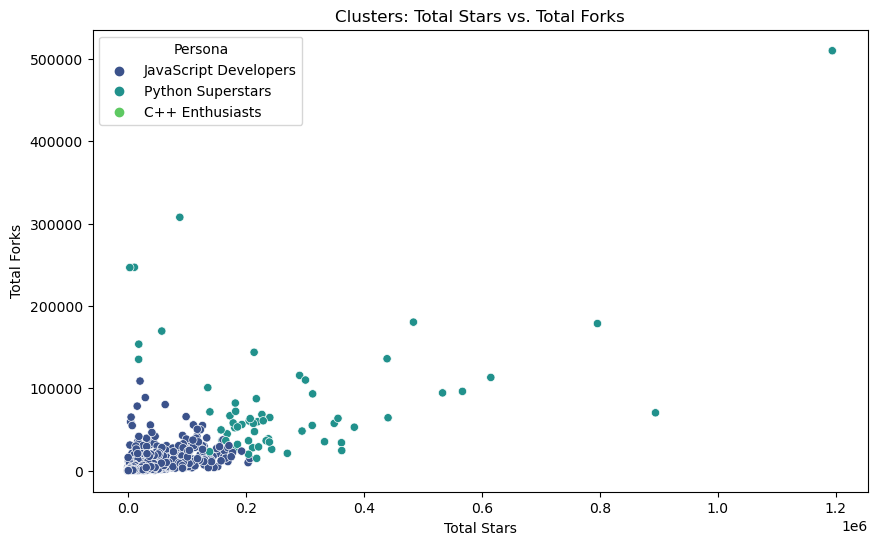

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: total_stars vs. total_forks, colored by persona_label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_stars', y='total_forks', hue='persona_label', data=data, palette='viridis')
plt.title('Clusters: Total Stars vs. Total Forks')
plt.xlabel('Total Stars')
plt.ylabel('Total Forks')
plt.legend(title='Persona')
plt.show()

In [9]:
import pandas as pd

# Load the dataset with persona labels
file_path = 'dataset_with_persona_labels.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

# Function to query candidates by persona
def query_candidates_by_persona(persona_label):
    return data[data['persona_label'] == persona_label]

# Example: Find all Python Superstars
python_superstars = query_candidates_by_persona('Python Superstars')
print("Python Superstars:")
print(python_superstars[['username', 'public_repos', 'total_stars', 'total_forks', 'followers']])

# Example: Find all JavaScript Developers
javascript_developers = query_candidates_by_persona('JavaScript Developers')
print("JavaScript Developers:")
print(javascript_developers[['username', 'public_repos', 'total_stars', 'total_forks', 'followers']])

# Example: Find all C++ Enthusiasts
cpp_enthusiasts = query_candidates_by_persona('C++ Enthusiasts')
print("C++ Enthusiasts:")
print(cpp_enthusiasts[['username', 'public_repos', 'total_stars', 'total_forks', 'followers']])

Python Superstars:
                 username  public_repos  total_stars  total_forks  followers
27                   twbs            26       217901        87458      12467
60                 996icu             1       270457        21109       8361
72        spring-projects            85       214135       143831      13423
85               ethereum           305       182278        82166      12499
105             rust-lang           223       349891        57495      13185
...                   ...           ...          ...          ...        ...
2162             FuelLabs           182       218492        15005       6475
2596           ant-design           138       182858        72101       2715
2679               square           300       295346        48178       2444
2894  practical-tutorials             1       221713        28966       3952
3975             fossasia           261       362654        24476       1896

[64 rows x 5 columns]
JavaScript Developers:
           

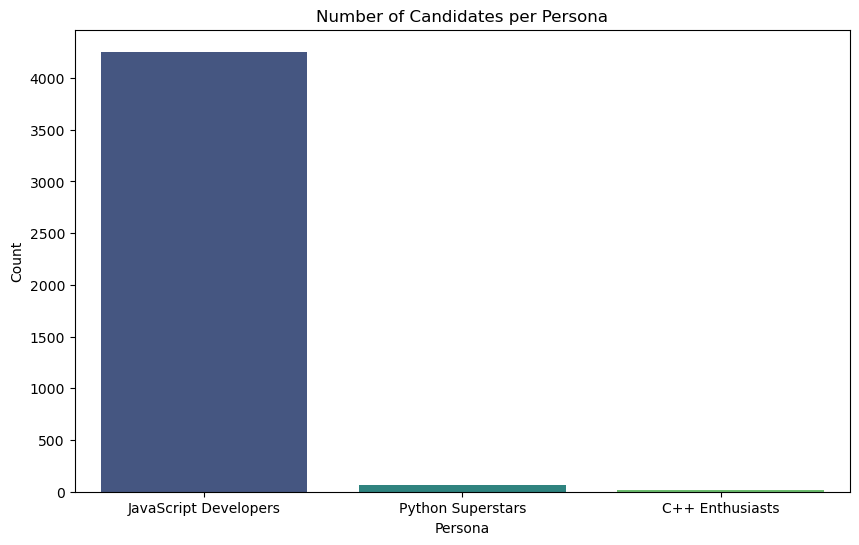

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Number of candidates per persona
plt.figure(figsize=(10, 6))
sns.countplot(x='persona_label', data=data, palette='viridis')
plt.title('Number of Candidates per Persona')
plt.xlabel('Persona')
plt.ylabel('Count')
plt.show()